In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import skewnorm
from scipy.stats import norm
import scipy.stats as stats

import matplotlib.pyplot as plt

import random

from google.colab import drive
drive.mount('/content/gdrive/')



Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

### Push distribution (Normal Dist) - Source Country

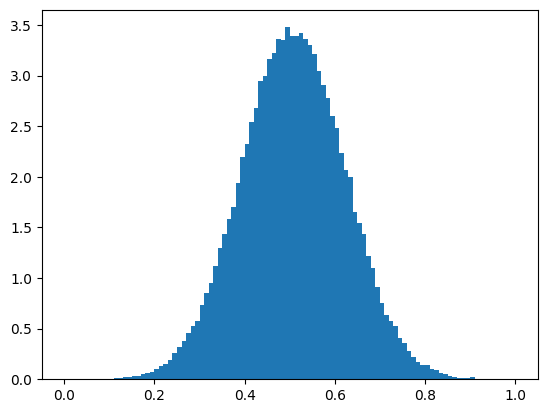

In [ ]:
# Push Distribution - standardized normal distribution

numValues = 100000
maxValue = 1
skewness = 0   #No skew

push_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

push_proto = push_proto - min(push_proto)      #Shift the set so the minimum value is equal to zero.
push_proto = push_proto / max(push_proto)      #Standadize all the vlues between 0 and 1.
push_proto = push_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_proto,100,density=True, alpha=1)
plt.show()


## Creating the pull and disruption distributions

## SkewNorm Distribution

Since Gamma distribution only allows for right skewed distributions, trying the skewnorm dist


Compared to the gamma dist, the control over the kurtosis is limited


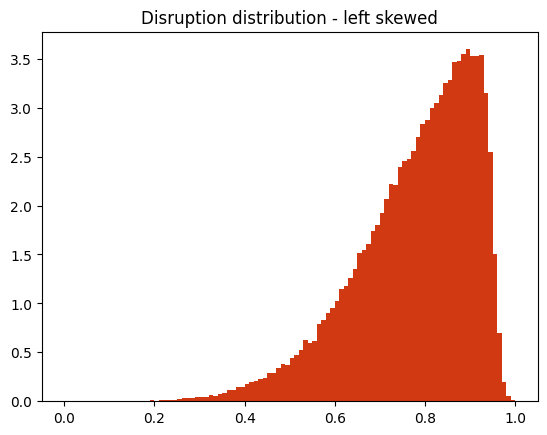

In [ ]:
# Disruption Distribution - left skewed

numValues = 100000
maxValue = 1
skewness = -15  #Negative values are left skewed, positive values are right skewed.

disrupt = skewnorm.rvs(a = skewness,loc=maxValue, scale=2, size=numValues)  #Skewnorm function

disrupt = disrupt - min(disrupt)      #Shift the set so the minimum value is equal to zero.
disrupt = disrupt / max(disrupt)      #Standadize all the vlues between 0 and 1.
disrupt = disrupt * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt,100,density=True, color = '#D13913', alpha=1)
plt.title('Disruption distribution - left skewed')
plt.show()

In [ ]:
print("Disruption distribution - Median: ", np.median(disrupt))
print("Disruption distribution - Mean: ", np.mean(disrupt))

print("Disruption distribution - Max: ", np.max(disrupt))
print("Disruption distribution - Min: ", np.min(disrupt))

Disruption distribution - Median:  0.8051051863772626
Disruption distribution - Mean:  0.7785824612874216
Disruption distribution - Max:  1.0
Disruption distribution - Min:  0.0


Trying out both a right skewed and left skewed pull distribution

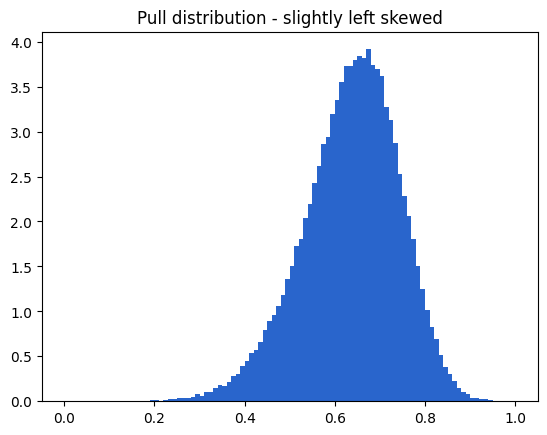

In [ ]:
# Pull Distribution - left skewed

numValues = 100000
maxValue = 1
skewness = -2   #Negative values are left skewed, positive values are right skewed.

pull_left = skewnorm.rvs(a = skewness, loc=maxValue, scale=2, size=numValues)  #Skewnorm function

pull_left = pull_left - min(pull_left)      #Shift the set so the minimum value is equal to zero.
pull_left = pull_left / max(pull_left)      #Standadize all the vlues between 0 and 1.
pull_left = pull_left * maxValue         #Multiply the standardized values by the maximum value.


#Plot histogram to check skewness
plt.hist(pull_left,100,density=True, color = '#2965CC', alpha=1)
plt.title('Pull distribution - slightly left skewed')
plt.show()

In [ ]:
print("Pull distribution - Median: ", np.median(pull_left))
print("Pull distribution - Mean: ", np.mean(pull_left))

print("Pull distribution - Max: ", np.max(pull_left))
print("Pull distribution - Min: ", np.min(pull_left))


Pull distribution - Median:  0.6439596467787256
Pull distribution - Mean:  0.6357221593735972
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


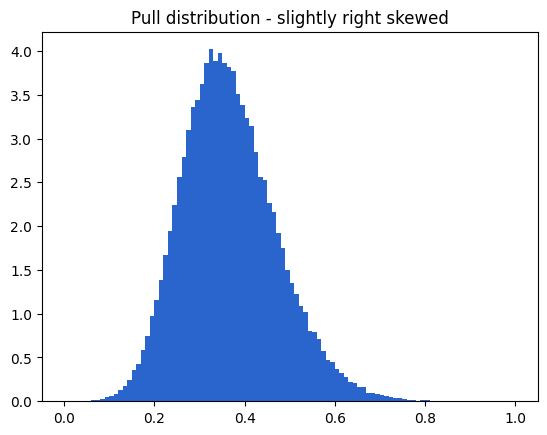

In [ ]:
# Pull Distribution - right skewed

numValues = 100000
maxValue = 1
skewness = 2   #Negative values are left skewed, positive values are right skewed.

pull_right = skewnorm.rvs(a = skewness, loc=maxValue, scale=2, size=numValues)  #Skewnorm function

pull_right = pull_right - min(pull_right)      #Shift the set so the minimum value is equal to zero.
pull_right = pull_right / max(pull_right)      #Standadize all the vlues between 0 and 1.
pull_right = pull_right * maxValue         #Multiply the standardized values by the maximum value.


#Plot histogram to check skewness
plt.hist(pull_right,100,density=True, color = '#2965CC', alpha=1)
plt.title('Pull distribution - slightly right skewed')
plt.show()

In [ ]:
print("Pull distribution - Median: ", np.median(pull_right))
print("Pull distribution - Mean: ", np.mean(pull_right))

print("Pull distribution - Max: ", np.max(pull_right))
print("Pull distribution - Min: ", np.min(pull_right))

Pull distribution - Median:  0.35801765187850076
Pull distribution - Mean:  0.36685034264103566
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


### Putting all the distributions together

In [ ]:
num_countries = len(df['Country'])
num_countries

221

In [33]:

def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals,middle_confidence_intervals, skews, pull_distribution, disruption_distribution, num_simulations):
    global_distribution = []


    for _ in range(num_simulations):
        country_sums = []

        # Pick a pull number and disruption number for each simulation
        pull_number = np.random.choice(pull_distribution)
        disruption_number = np.random.choice(disruption_distribution)

        # choose a non-zero disruption number (zero would result in an infinity weighted number)
        #if disruption_number == 0:
        #  disruption_number = np.random.choice(disruption_distribution)

        #if pull_number == 0:
        #  pull_number = np.random.choice(pull_distribution)

        #disruption number is not the problem


        for i in range(num_countries):

            # pick a push number for each country (from a normal distribution)
            push_number = np.random.choice(push_proto)

            #if push_number == 0:
            #  push_number = np.random.choice(push_proto)

            # Calculate the weighted number
            weighted_number = (((0.50 * push_number) + (0.50 * pull_number)) **  disruption_number)

            # Ensure adjusted weighted number is within valid range
            weighted_number = np.clip(weighted_number, 0.00001, 0.99999)

            # if weighted_number = 1 --> leads to infinity
            # if weighted_number = 0 --> leads to minus infinity

            #==============================================================================================================================================#

            # Using the weighted_number to pick out a point from the country's distribution

            # Creating the country's distribution based on it's lower, upper, middle values
            lower = lower_confidence_intervals[i]
            upper = upper_confidence_intervals[i]
            middle = middle_confidence_intervals[i]
            skew = skews[i]


            # instead of using the triangular distribution, using a normal distribution
            if skew == "Mid":
              a=0
            elif skew == "Lower":
              a=2
            elif skew == "Upper":
              a=-2


            # generate distributions for the countrys, taking skew into account as well
            country_dist = skewnorm(a,loc=middle,scale = np.std([lower, middle, upper]))

            # picking a number from the country distribution based on the weighted number as a percentile
            picked_number = country_dist.ppf(weighted_number)

            # store the picked number
            country_sums.append(picked_number)

        # Sum the volumes from all countries
        global_distribution.append(sum(country_sums))


    return global_distribution



In [34]:
#1000 iterations - with left skewed pull dist

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_left, disrupt, num_simulations=1000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1378927.440833264
Median global volume: 1469961.824476976
Upper global confidence interval: 1569007.9660801457


In [ ]:
#1M iterations - with left skewed pull dist

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_left, disrupt, num_simulations=1000000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)


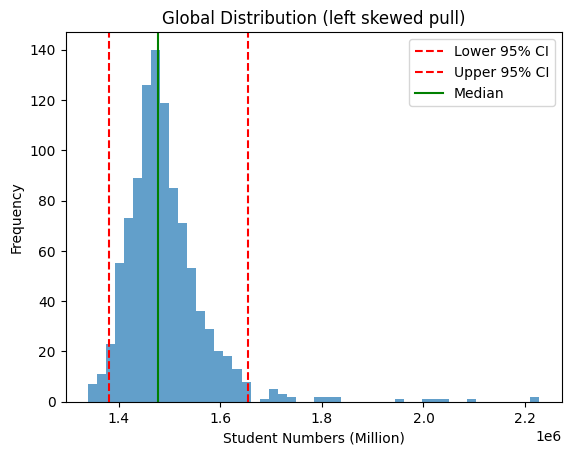

In [ ]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('Global Distribution (left skewed pull)')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [35]:
#1000 iterations - with right skewed pull dist

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_right, disrupt, num_simulations=1000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)


Lower global confidence interval: 1298605.6780801953
Median global volume: 1386002.9272701964
Upper global confidence interval: 1513801.426060697


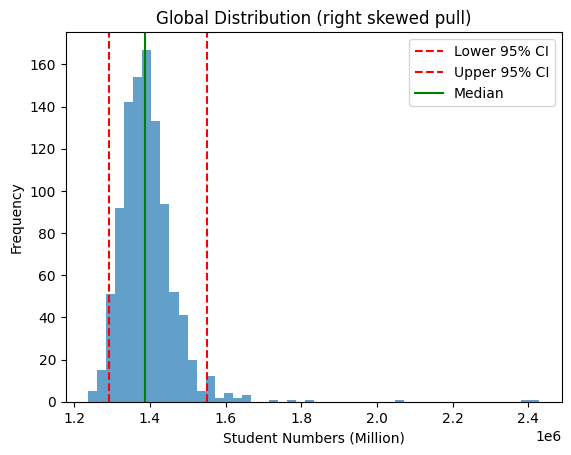

In [ ]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('Global Distribution (right skewed pull)')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Trying to rescale the distribution

In [29]:
global_distribution_copy = global_distribution.copy()
global_distribution_copy = np.array(global_distribution_copy)

In [ ]:
# Calculate the scaling factor
scaling_factor = np.std([1200000, 1400000, 1700000]) / np.std(global_distribution_copy)  # (Target standard deviation / current standard deviation)

# Apply the scaling factor to shift or scale the distribution
global_distribution_copy = global_distribution_copy * scaling_factor


In [30]:


# Desired standard deviation and mean
desired_std = 205480
desired_mean = 1400000

# Calculate current standard deviation and mean
current_std = np.std(global_distribution_copy)
current_mean = np.mean(global_distribution_copy)

# Calculate scaling factor for standard deviation
scaling_factor_std = desired_std / current_std

# Calculate shift for mean
shift = desired_mean - current_mean

# Scale the global_distribution_copy to adjust standard deviation and mean
scaled_global_distribution_copy = (global_distribution_copy * scaling_factor_std) + shift

# Verify the new standard deviation and mean
new_std = np.std(scaled_global_distribution_copy)
new_mean = np.mean(scaled_global_distribution_copy)

print("New Standard Deviation:", new_std)
print("New Mean:", new_mean)


New Standard Deviation: 205479.99999999997
New Mean: 3491125.9489502753


In [31]:
current_mean

1394908.3667361427

In [32]:
current_std

82221.15597290227